## Data from https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [240]:
#cumulative

In [241]:
df_confirm = pd.read_csv('time_series_covid19_confirmed_global.csv')
print(df_confirm.shape)
print(df_confirm.info())
df_confirm = df_confirm[df_confirm['Country/Region']=='Japan']
df_confirm.head()

(279, 561)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Columns: 561 entries, Province/State to 7/31/21
dtypes: float64(2), int64(557), object(2)
memory usage: 1.2+ MB
None


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21
155,NaN,Japan,36.204824,138.252924,2,2,2,2,4,4,...,858503,862585,866325,871360,876059,883767,893442,904126,914718,927058


In [242]:
df_death = pd.read_csv('time_series_covid19_deaths_global.csv')
print(df_death.shape)
print(df_death.info())
df_death = df_death[df_death['Country/Region']=='Japan']
df_death.head()

(279, 561)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Columns: 561 entries, Province/State to 7/31/21
dtypes: float64(2), int64(557), object(2)
memory usage: 1.2+ MB
None


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21
155,NaN,Japan,36.204824,138.252924,0,0,0,0,0,0,...,15052,15059,15068,15072,15084,15096,15174,15188,15197,15206


In [243]:
df_recovered = pd.read_csv('time_series_covid19_recovered_global.csv')
print(df_recovered.shape)
print(df_recovered.info())
df_recovered = df_recovered[df_recovered['Country/Region']=='Japan']

df_recovered.head()

(264, 561)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Columns: 561 entries, Province/State to 7/31/21
dtypes: float64(2), int64(557), object(2)
memory usage: 1.1+ MB
None


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21
140,NaN,Japan,36.204824,138.252924,0,0,0,0,1,1,...,806046,808257,810728,813868,816719,819982,823745,827216,830931,834811


In [260]:
#Japan
frames = [df_confirm,df_death,df_recovered]
df = pd.concat(frames)
df = df.drop(['Province/State','Lat','Long','Country/Region'],axis=1)
df.index =['Infected_total','Deaths_total','Recovered_total']
df = df.T
df.index = pd.to_datetime(df.index)
df

,Infected_total,Deaths_total,Recovered_total
2020-01-22,2,0,0
2020-01-23,2,0,0
2020-01-24,2,0,0
2020-01-25,2,0,0
2020-01-26,4,0,1
...,...,...,...
2021-07-27,883767,15096,819982
2021-07-28,893442,15174,823745
2021-07-29,904126,15188,827216
2021-07-30,914718,15197,830931


In [261]:
Confirmed_daily = np.array([0]*len(df))
Deaths_daily = np.array([0]*len(df))
Recovered_daily = np.array([0]*len(df))

for i in range(0,len(df)-1):
    Confirmed_daily[i] = (df['Infected_total'][i+1] - df['Infected_total'][i])
    Deaths_daily[i] = (df['Deaths_total'][i+1] - df['Deaths_total'][i])
    Recovered_daily[i] = (df['Recovered_total'][i+1] - df['Recovered_total'][i])

In [263]:
df['Confirmed'] = Confirmed_daily
df['Deaths'] = Deaths_daily
df['Recovered'] =Recovered_daily
df.drop(df.tail(1).index,inplace=True) # drop last n rows


In [264]:
indexNames = df[ (df['Confirmed'] <0) | (df['Deaths'] <0) | (df['Recovered'] <0)   ].index
df.drop(indexNames , inplace=True)

In [265]:
df

,Infected_total,Deaths_total,Recovered_total,Confirmed,Deaths,Recovered
2020-01-22,2,0,0,0,0,0
2020-01-23,2,0,0,0,0,0
2020-01-24,2,0,0,0,0,0
2020-01-25,2,0,0,2,0,1
2020-01-26,4,0,1,0,0,0
...,...,...,...,...,...,...
2021-07-26,876059,15084,816719,7708,12,3263
2021-07-27,883767,15096,819982,9675,78,3763
2021-07-28,893442,15174,823745,10684,14,3471
2021-07-29,904126,15188,827216,10592,9,3715


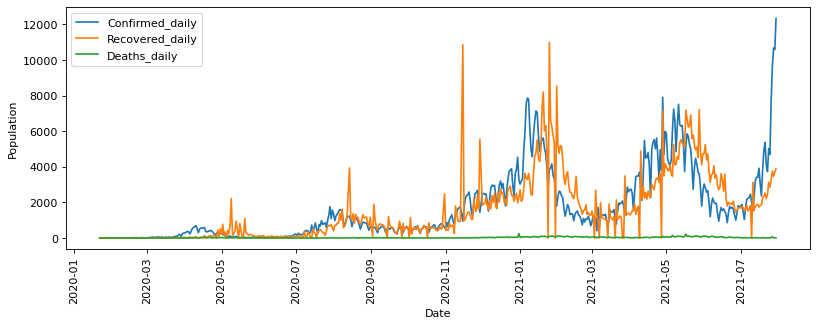

In [266]:
from matplotlib.pyplot import figure

figure(figsize=(12, 4), dpi=80)
plt.plot(df.index, df['Confirmed'], label='Confirmed_daily')
plt.plot(df.index, df['Recovered'], label='Recovered_daily')
plt.plot(df.index, df['Deaths'], label='Deaths_daily')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.show()

In [267]:
#adding remove col
df['Removed_tol'] = df['Deaths_total']+df['Recovered_total']

In [268]:
df

,Infected_total,Deaths_total,Recovered_total,Confirmed,Deaths,Recovered,Removed_tol
2020-01-22,2,0,0,0,0,0,0
2020-01-23,2,0,0,0,0,0,0
2020-01-24,2,0,0,0,0,0,0
2020-01-25,2,0,0,2,0,1,0
2020-01-26,4,0,1,0,0,0,1
...,...,...,...,...,...,...,...
2021-07-26,876059,15084,816719,7708,12,3263,831803
2021-07-27,883767,15096,819982,9675,78,3763,835078
2021-07-28,893442,15174,823745,10684,14,3471,838919
2021-07-29,904126,15188,827216,10592,9,3715,842404


In [252]:
from datetime import timedelta

In [253]:
df.index[0] + pd.DateOffset(days=550)

Timestamp('2021-07-25 00:00:00')

In [254]:
new_date = []
for i in range(0,550):
    new_date.append(df.index[0] + pd.DateOffset(days=i))

In [255]:
len(new_date)

550

In [256]:
df['Date'] =new_date

In [257]:
df = df.reset_index(drop = True)

In [258]:
df

,Confirmed_total,Deaths_total,Recovered_total,Confirmed,Deaths,Recovered,Removed_tol,Date
0,2,0,0,0,0,0,0,2020-01-22
1,2,0,0,0,0,0,0,2020-01-23
2,2,0,0,0,0,0,0,2020-01-24
3,2,0,0,2,0,1,0,2020-01-25
4,4,0,1,0,0,0,1,2020-01-26
...,...,...,...,...,...,...,...,...
545,876059,15084,816719,7708,12,3263,831803,2021-07-20
546,883767,15096,819982,9675,78,3763,835078,2021-07-21
547,893442,15174,823745,10684,14,3471,838919,2021-07-22
548,904126,15188,827216,10592,9,3715,842404,2021-07-23


In [269]:
df.to_csv('cov_japan_2021_07_30.csv',index = False)